<h1>[K-means algorithm on color image]</h1>
Let $f(x)$ be a color image and $x$ be the index of image in the domain.
The values of image $f(x)$ consist of [red, green, blue] intensity.

Apply K-means algorithm to image $f(x)$ based on its color value with given number of clusters $K$ and visualize the progress of optimization and results of the algorithm for each selected number of clusters $K$.

1. Select any color image that consists of distinctive regions with different colors.
2. Apply K-means algorithm to the given image with at least 4 different choice of $K$.
3. For each $K$, plot the energy curve and the result image.

[Visualisation]

1. Input color image
2. Energy curve for each $K$
3. Output image for each $K$

[Energy]

$$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2,$$

where $\Omega$ denotes the image domain and the number of pixels $| \Omega |$ is $n$, and $m_c$ denotes the centroid for cluster $c$ that is the cluster label of $f(x)$.

[Output Image]

$$g(x) = m_c where \:label(x) = c$$

Each pixel of the output image $g(x)$ should be its centroid $m_c$ where $c$ is the cluster label of $g(x)$.

In [195]:
import PIL.Image as pilimg # for reading image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Read Image data and Show</h2>

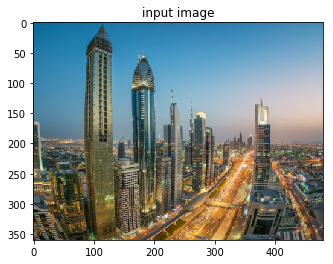

In [196]:
# Read image
im = pilimg.open("Dubai_input.jpg")
 
# Fetch image pixel data to numpy array
pix = np.array(im)
plt.title('input image')
plt.imshow(pix)

<h2>Convert Matrix form for calculating</h2>

In [197]:
size_row = len(pix)    # height of the image
size_col = len(pix[0]) # width of the image
pixel_num = size_row * size_col

pix = pix.reshape(-1,3) # reshape the pixel array to 2-dimentional matrix
print(pix.shape[0])
pix = pix.transpose()
print(pix.shape)

172800
(3, 172800)


In [198]:
def Distance(x, y):

    d = (x - y) ** 2   
    s = np.sum(d)

    return(s)

In [199]:
def generateCluster(cluster_num):# K-means알고리즘을 시작하기 위한 함수
    
    # 클러스터의 개수
    k = cluster_num
    # 각 픽셀에 대해 소속 클러스터를 표시하기 위한 라벨
    cluster_label = np.zeros(pixel_num)                   
    # 클러스터 마다의 centroid
    average_pixel = np.zeros((3, cluster_num), dtype=int) 
    # centroid와 각 pixel간의 distance를 담은 배열   
    distance = np.zeros((cluster_num, pixel_num), dtype=float)
    
    return k, cluster_label, average_pixel, distance

In [200]:
def initializeLabel(cluster_num, cluster_label): # 클러스터링 라벨 초기화
    random_seed=np.random.rand(len(cluster_label))*100 
    #variable that will be substituted to the label
    
    for i in range(len(cluster_label)):                   
        random_seed[i] = int(random_seed[i])
        random_seed[i] = random_seed[i] % cluster_num # 랜덤하게 초기화
    for i in range(len(cluster_label)):                       
        cluster_label[i] = random_seed[i]
    return

def computeCentroid(cluster_num, pix,cluster_label):  #compute the average(center) of 
                                                #listimage sharing  same label
    sum = np.zeros((3 ,cluster_num))      # 각 클러스터의 픽셀 값의 합
    num = np.zeros(cluster_num)           # 각 클러스터의 픽셀 개수(dividance)
    
    for i in range(pix.shape[1]): # 전체 픽셀 개수만큼 진행       
        sum[:,int(cluster_label[i])] = sum[:,int(cluster_label[i])] + pix[:,i]
        # must change the type of label[i] to type(int)
        num[int(cluster_label[i])] = num[int(cluster_label[i])]+1
        # count the number
    for i in range(cluster_num):
        sum[:,i] /= num[i]                         # sum goes to be a mean value
    return sum

In [201]:
def assignLabel(list_image,average_image,label,distance): #compute the distance 
                                                #average images and images. 
                                                #And update the label of points
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):
            distance[j,i]=Distance(average_image[:,j],list_image[:,i])
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):               
            if distance[j,i]==distance[:,i].min():  #when thd distance is minimum
                label[i]=j                          #update label
    return

def represent(label,list_label,num):#num : 0 ~ k-1. we don't know what the most number 
                                    #in the cluster(num)'s is. this funstion 
                                    #will return the most number of certain cluster.
    num_arr=np.zeros(10)
    num_rep=-1
    for i in range(len(label)):
        if(label[i]==num):
            num_arr[list_label[i]]+=1
    for i in range(10):
        if(num_arr.max()==num_arr[i]):
            num_rep=i
    return num_rep                  #return the number that appeared the most

def computeAccuracy(label,list_label,cluster_num): #compute the accuracy
    sum=0
    num_arr=np.zeros(10)
    for j in range(cluster_num):
        num=0
        for ii in range(10):
            num_arr[ii]=0
        for i in range(len(label)):
            if(label[i]==j):
                num_arr[list_label[i]]+=1
                num+=1
        sum+=num_arr.max()/num
    return 100*sum/cluster_num  #accuracy will be returned 

def plotEnergyAndAccuracy(energy,accuracy): #plot the energy and accuracy
    plt.figure(1)
    x=np.arange(1,len(energy)+1)
    plt.plot(x, energy, 'b', label="energy")
    plt.plot(x, accuracy, 'r', label="accuracy")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
def plotEnergy(energy): #plot the energy
    plt.figure(1)
    x = np.arange(1,len(energy)+1)
    plt.title('Energy Curve')
    plt.plot(x, energy, 'b', label="energy")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

<h2>Set pixel values with images in the cluster to which they belong and Print Output Image</h2>

In [202]:
def plotCentoidImages(average_pixel, cluster_label):  
    # draw image using average_pixels 
    
    plt.figure(1)
    # centroid pixel로만 만들 이미지 배열
    output_pixel = np.zeros((3, pixel_num), dtype=int) 
    for i in range(pixel_num):
        output_pixel[:,i] = average_pixel[:,int(cluster_label[i])]

    output_pixel = output_pixel.transpose()
    output_pixel = output_pixel.reshape(size_row, size_col, 3)
    plt.title('output image')
    plt.imshow(output_pixel)
    return

<h2>make plot for Energy</h2>

In [203]:
def computeEnergy(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                             #images and corresponding average images(center)
    return energy_sum/distance.shape[1]

<h2>K=2</h2>

1th iteration -   Energy:  8852.321996790046
2th iteration -   Energy:  4916.296151491077
3th iteration -   Energy:  4590.469858622517
4th iteration -   Energy:  4372.133771567036
5th iteration -   Energy:  4237.479465502854
6th iteration -   Energy:  4199.784049908074
7th iteration -   Energy:  4194.913905328913
8th iteration -   Energy:  4194.416861382406
9th iteration -   Energy:  4194.35014693909
10th iteration -   Energy:  4194.337237573172
11th iteration -   Energy:  4194.333545163236
12th iteration -   Energy:  4194.3319331735265
13th iteration -   Energy:  4194.3316377057745
14th iteration -   Energy:  4194.331558908426
15th iteration -   Energy:  4194.331536448847
16th iteration -   Energy:  4194.331529600728
17th iteration -   Energy:  4194.331521603483
18th iteration -   Energy:  4194.331515995893
19th iteration -   Energy:  4194.331515191956


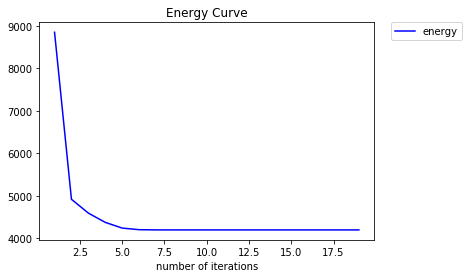

In [193]:
# K = 2
k, cluster_label, average_pixel, distance = generateCluster(2) #choose the num of cluster
initializeLabel(k, cluster_label) #randomly initialize labels
average_pixel = computeCentroid(k, pix, cluster_label) #compute the average image
energy = [] #array for energy
num_iteration=0
previous_pixel = np.zeros((3, k), dtype=int) 
while not np.array_equal(previous_pixel, average_pixel): 
    assignLabel(pix,average_pixel,cluster_label,distance) #update labels
    previous_pixel = average_pixel
    average_pixel=computeCentroid(k,pix,cluster_label)    #update average_image
    energy.append(computeEnergy(distance))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance))
    
plotEnergy(energy)

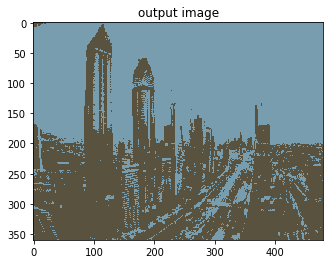

In [194]:
plotCentoidImages(average_pixel, cluster_label)

<h2>K=4</h2>

1th iteration -   Energy:  8851.409351307953
2th iteration -   Energy:  2724.7985093285747
3th iteration -   Energy:  2186.3272501040356
4th iteration -   Energy:  1985.6428847685015
5th iteration -   Energy:  1835.5994309936502
6th iteration -   Energy:  1771.3760258700306
7th iteration -   Energy:  1744.2508937261525
8th iteration -   Energy:  1731.7625621763082
9th iteration -   Energy:  1725.533080188033
10th iteration -   Energy:  1722.213949422996
11th iteration -   Energy:  1720.398904759013
12th iteration -   Energy:  1719.4191212331534
13th iteration -   Energy:  1718.8793958247024
14th iteration -   Energy:  1718.5930413365375
15th iteration -   Energy:  1718.415243641158
16th iteration -   Energy:  1718.3123240607397
17th iteration -   Energy:  1718.252304880609
18th iteration -   Energy:  1718.210709474979
19th iteration -   Energy:  1718.1856395167715
20th iteration -   Energy:  1718.1704872338264
21th iteration -   Energy:  1718.1595374511508
22th iteration -   Energy:  1

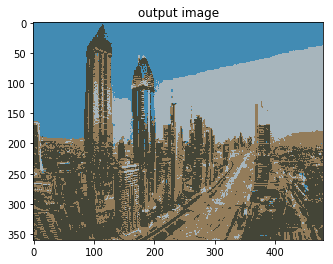

In [182]:
# K = 4
k, cluster_label, average_pixel, distance = generateCluster(4) #choose the num of cluster
initializeLabel(k, cluster_label) #randomly initialize labels
average_pixel = computeCentroid(k, pix, cluster_label) #compute the average image
energy = [] #array for energy
num_iteration=0
previous_pixel = np.zeros((3, k), dtype=int) 
while not np.array_equal(previous_pixel, average_pixel): 
    assignLabel(pix,average_pixel,cluster_label,distance) #update labels
    previous_pixel = average_pixel
    average_pixel=computeCentroid(k,pix,cluster_label)    #update average_image
    energy.append(computeEnergy(distance))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance))
plotCentoidImages(average_pixel, cluster_label)

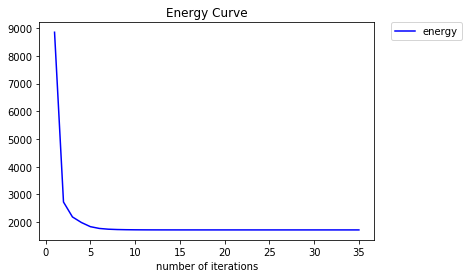

In [183]:
plotEnergy(energy)

<h2>K=5</h2>

In [127]:
# K = 5
k, cluster_label, average_pixel, distance = generateCluster(5) #choose the num of cluster
initializeLabel(k, cluster_label) #randomly initialize labels
average_pixel = computeCentroid(k, pix, cluster_label) #compute the average image

1th iteration -   Energy:  8763.617544850746
2th iteration -   Energy:  2559.6566714658443
3th iteration -   Energy:  1629.064982036192
4th iteration -   Energy:  1438.6086771013438
5th iteration -   Energy:  1388.1731158530515
6th iteration -   Energy:  1372.8982674575084
7th iteration -   Energy:  1367.9625920265769
8th iteration -   Energy:  1365.660411222279
9th iteration -   Energy:  1364.281941100003
10th iteration -   Energy:  1363.372791392014
11th iteration -   Energy:  1362.7928791338372
12th iteration -   Energy:  1362.3963047178179
13th iteration -   Energy:  1362.1206740269513
14th iteration -   Energy:  1361.956321381525
15th iteration -   Energy:  1361.8551067280102
16th iteration -   Energy:  1361.7853352941327
17th iteration -   Energy:  1361.7287985635212
18th iteration -   Energy:  1361.6936087526526
19th iteration -   Energy:  1361.6711771542105
20th iteration -   Energy:  1361.6570221052752
21th iteration -   Energy:  1361.6485396227588
22th iteration -   Energy:  

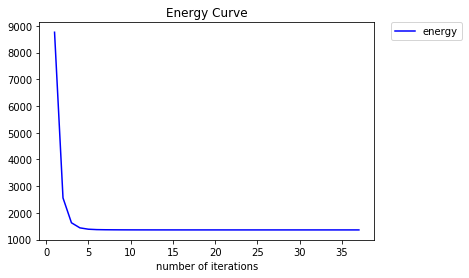

In [128]:
energy = [] #array for energy
num_iteration=0
previous_pixel = np.zeros((3, k), dtype=int) 
while not np.array_equal(previous_pixel, average_pixel): 
    assignLabel(pix,average_pixel,cluster_label,distance) #update labels
    previous_pixel = average_pixel
    average_pixel=computeCentroid(k,pix,cluster_label)    #update average_image
    energy.append(computeEnergy(distance))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance))
plotEnergy(energy)

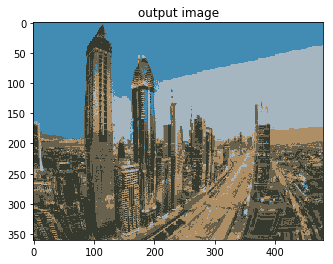

In [114]:
plotCentoidImages(average_pixel, cluster_label)

<h2>K=10</h2>

1th iteration -   Energy:  8702.094069104503
2th iteration -   Energy:  1549.3914939585607
3th iteration -   Energy:  1118.3850749359601
4th iteration -   Energy:  908.5365184586032
5th iteration -   Energy:  829.545851404921
6th iteration -   Energy:  792.4141824435619
7th iteration -   Energy:  770.6509070107666
8th iteration -   Energy:  757.0861069630013
9th iteration -   Energy:  748.211764855958
10th iteration -   Energy:  741.781499228682
11th iteration -   Energy:  736.9347656981288
12th iteration -   Energy:  733.178523303407
13th iteration -   Energy:  730.3991579463345
14th iteration -   Energy:  728.3003269556863
15th iteration -   Energy:  726.7207001112275
16th iteration -   Energy:  725.388643050449
17th iteration -   Energy:  724.3982337108021
18th iteration -   Energy:  723.6221234728995
19th iteration -   Energy:  722.989513233412
20th iteration -   Energy:  722.4997172500705
21th iteration -   Energy:  722.1184046843929
22th iteration -   Energy:  721.7891173703609
2

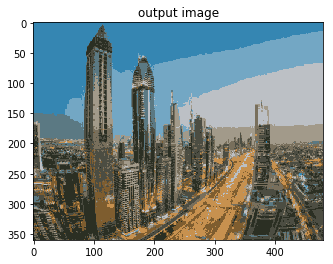

In [204]:
# K = 10
k, cluster_label, average_pixel, distance = generateCluster(10) #choose the num of cluster
initializeLabel(k, cluster_label) #randomly initialize labels
average_pixel = computeCentroid(k, pix, cluster_label) #compute the average image
energy = [] #array for energy
num_iteration=0
previous_pixel = np.zeros((3, k), dtype=int) 
while not np.array_equal(previous_pixel, average_pixel): 
    assignLabel(pix,average_pixel,cluster_label,distance) #update labels
    previous_pixel = average_pixel
    average_pixel=computeCentroid(k,pix,cluster_label)    #update average_image
    energy.append(computeEnergy(distance))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance))
plotCentoidImages(average_pixel, cluster_label)

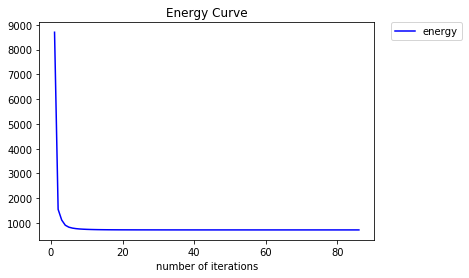

In [205]:
plotEnergy(energy)